In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape


(730, 16)

In [4]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping instant column as there is no effect on target column
# Dropping dteday because we can use weekday and month analyze data
# Dropping Casual and registered as these are sum of cnt target variable
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


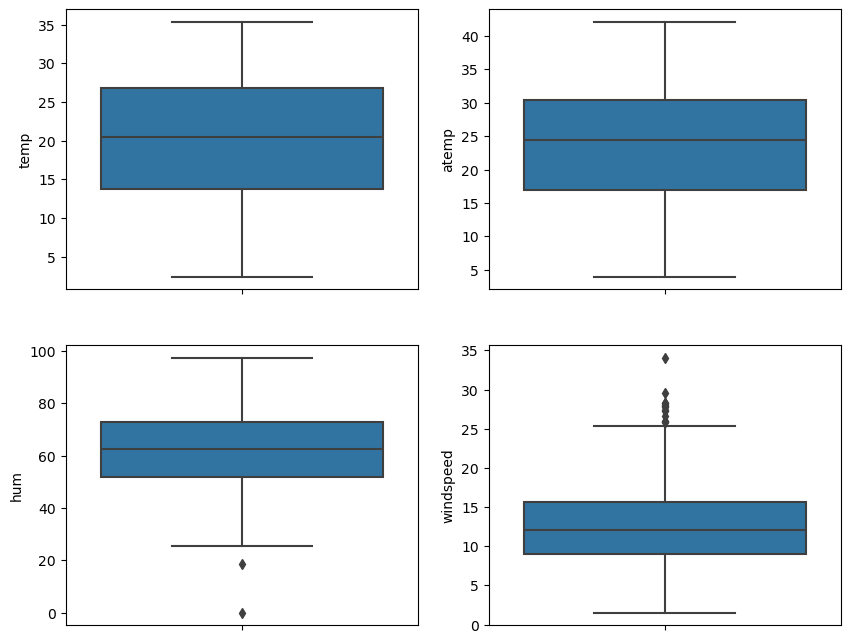

In [9]:
# checking for outliers
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y='temp', data=bike)
plt.subplot(2, 2, 2)
sns.boxplot(y='atemp', data=bike)
plt.subplot(2, 2, 3)
sns.boxplot(y='hum', data=bike)
plt.subplot(2, 2, 4)
sns.boxplot(y='windspeed', data=bike)
plt.show()

In [10]:
# Checking seasonal impact on rental bikes
round(bike.groupby('season')['cnt'].sum()/bike.cnt.sum()*100, 2)

season
1    14.27
2    27.91
3    32.24
4    25.57
Name: cnt, dtype: float64

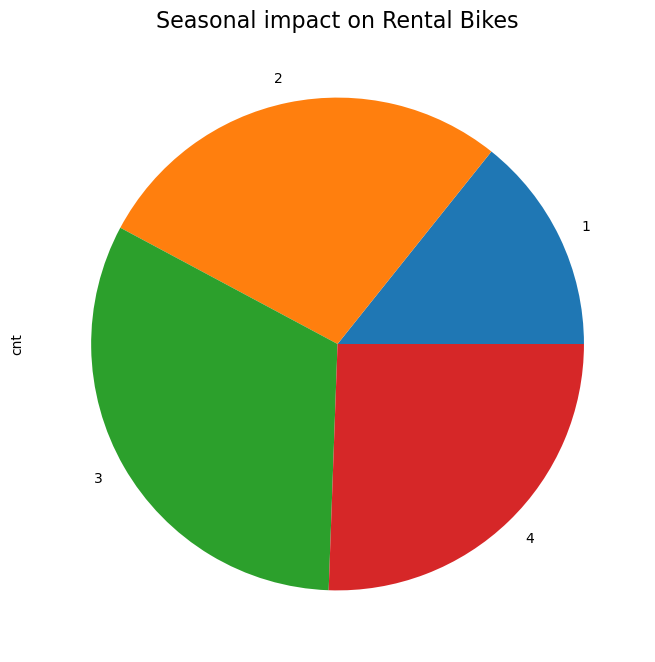

In [11]:
plt.figure(figsize=(8,8))
bike.groupby('season')['cnt'].sum().plot.pie()
plt.title("Seasonal impact on Rental Bikes", fontsize=16)
plt.show()

# Observation

Spring has least bike rentals while Fall has the highest bike rentals

In [12]:
# check for total rental bikes in an year
round(bike.groupby('yr')['cnt'].sum()/bike.cnt.sum()*100, 2)

yr
0    37.77
1    62.23
Name: cnt, dtype: float64

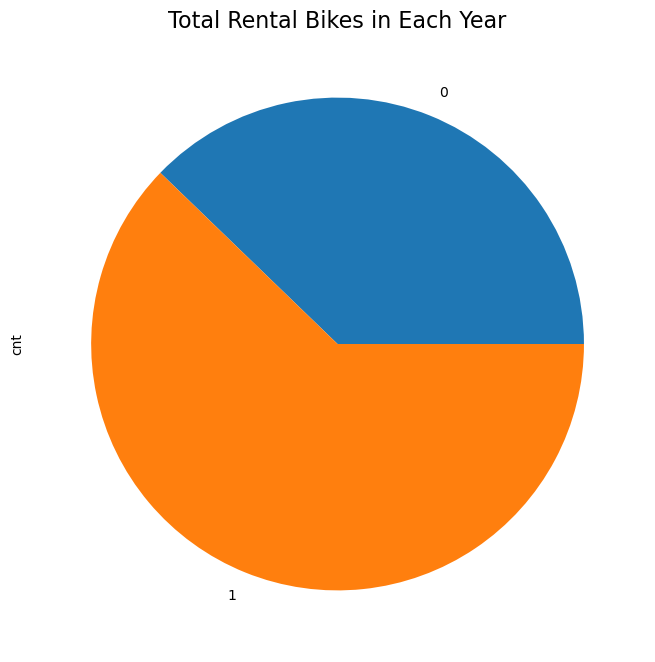

In [13]:
# year (0: 2018, 1:2019)
plt.figure(figsize=(8,8))
bike.groupby('yr')['cnt'].sum().plot.pie()
plt.title("Total Rental Bikes in Each Year", fontsize=16)
plt.show()

# Observation

There is increase in bike rentals from 2018 to 2019

In [14]:
# Check for Rental bike count for each month
round(bike.groupby('mnth')['cnt'].sum()/bike.cnt.sum()*100, 2)

mnth
1      4.10
2      4.54
3      6.96
4      8.18
5     10.08
6     10.52
7     10.48
8     10.67
9     10.51
10     9.80
11     7.74
12     6.41
Name: cnt, dtype: float64

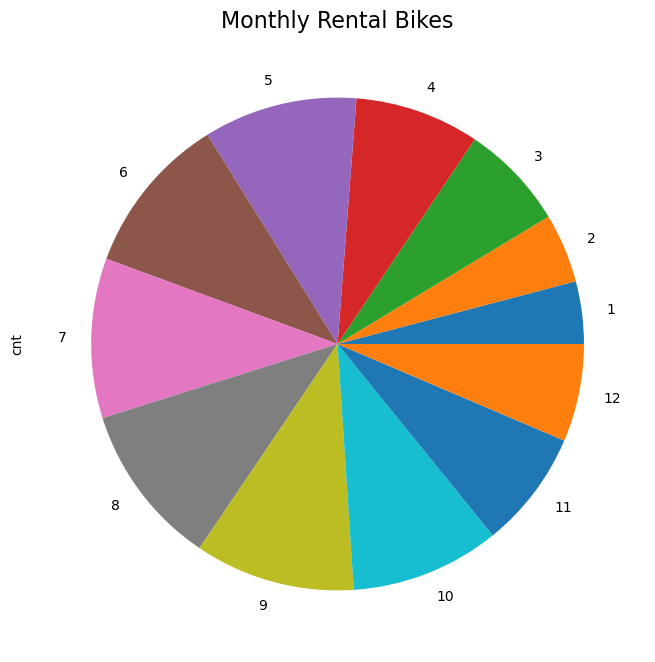

In [15]:
plt.figure(figsize=(8,8))
bike.groupby('mnth')['cnt'].sum().plot.pie()
plt.title("Monthly Rental Bikes", fontsize=16)
plt.show()

# Observation 

From April to October has good demand for Bike Rentals

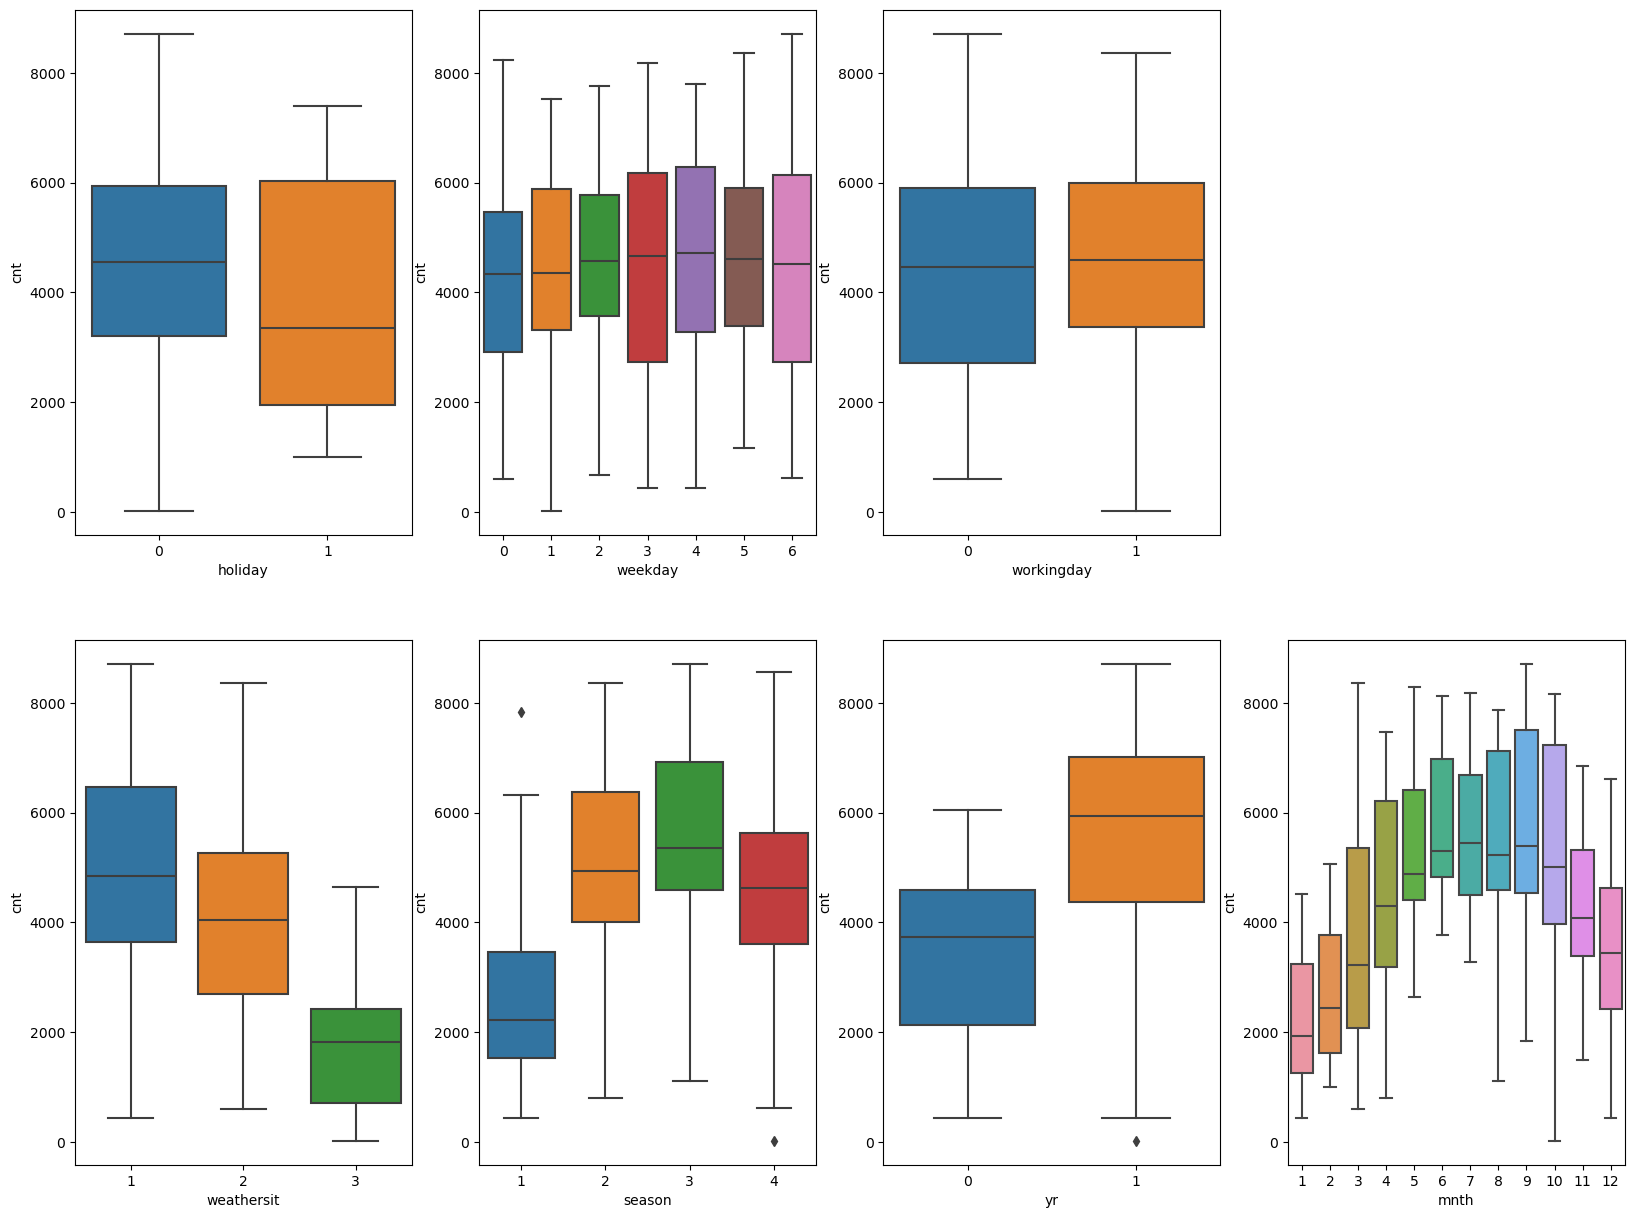

In [19]:
# Boxplot for categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(2, 4, 2)
sns.boxplot(x='weekday',y='cnt', data=bike)
plt.subplot(2, 4, 3)
sns.boxplot(x='workingday',y='cnt', data=bike)
plt.subplot(2, 4, 5)
sns.boxplot(x='weathersit',y='cnt', data=bike)
plt.subplot(2, 4, 6)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(2, 4, 7)
sns.boxplot(x='yr',y='cnt', data=bike)
plt.subplot(2, 4, 8)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.show()

## Observation

1. The graph effectively illustrates the qualitative distribution of the data. When combined with the model's identified key predictors, these graphs enhance our confidence in the model's predictions. For the variable "season," it is evident that Category 3 (Fall) has the highest median, indicating increased demand during this season, while Category 1 (Spring) shows the lowest demand.

2. In comparison, 2019 saw a higher user count than 2018. Rental counts are fairly consistent throughout the week. There is a noticeable drop in rentals during heavy rain or snow, suggesting these weather conditions are particularly adverse. The highest rental counts occur during Clear and Partly Cloudy weather conditions.

3. Rentals peaked in September, while December saw a decrease, likely due to typical substantial snowfall during that month. Additionally, user counts are lower during holidays.

4. The "Workingday" boxplot shows that most bookings occur between 4000 and 6000, with the median user count remaining relatively stable throughout the week. There is little difference in bookings whether it is a working day or not.

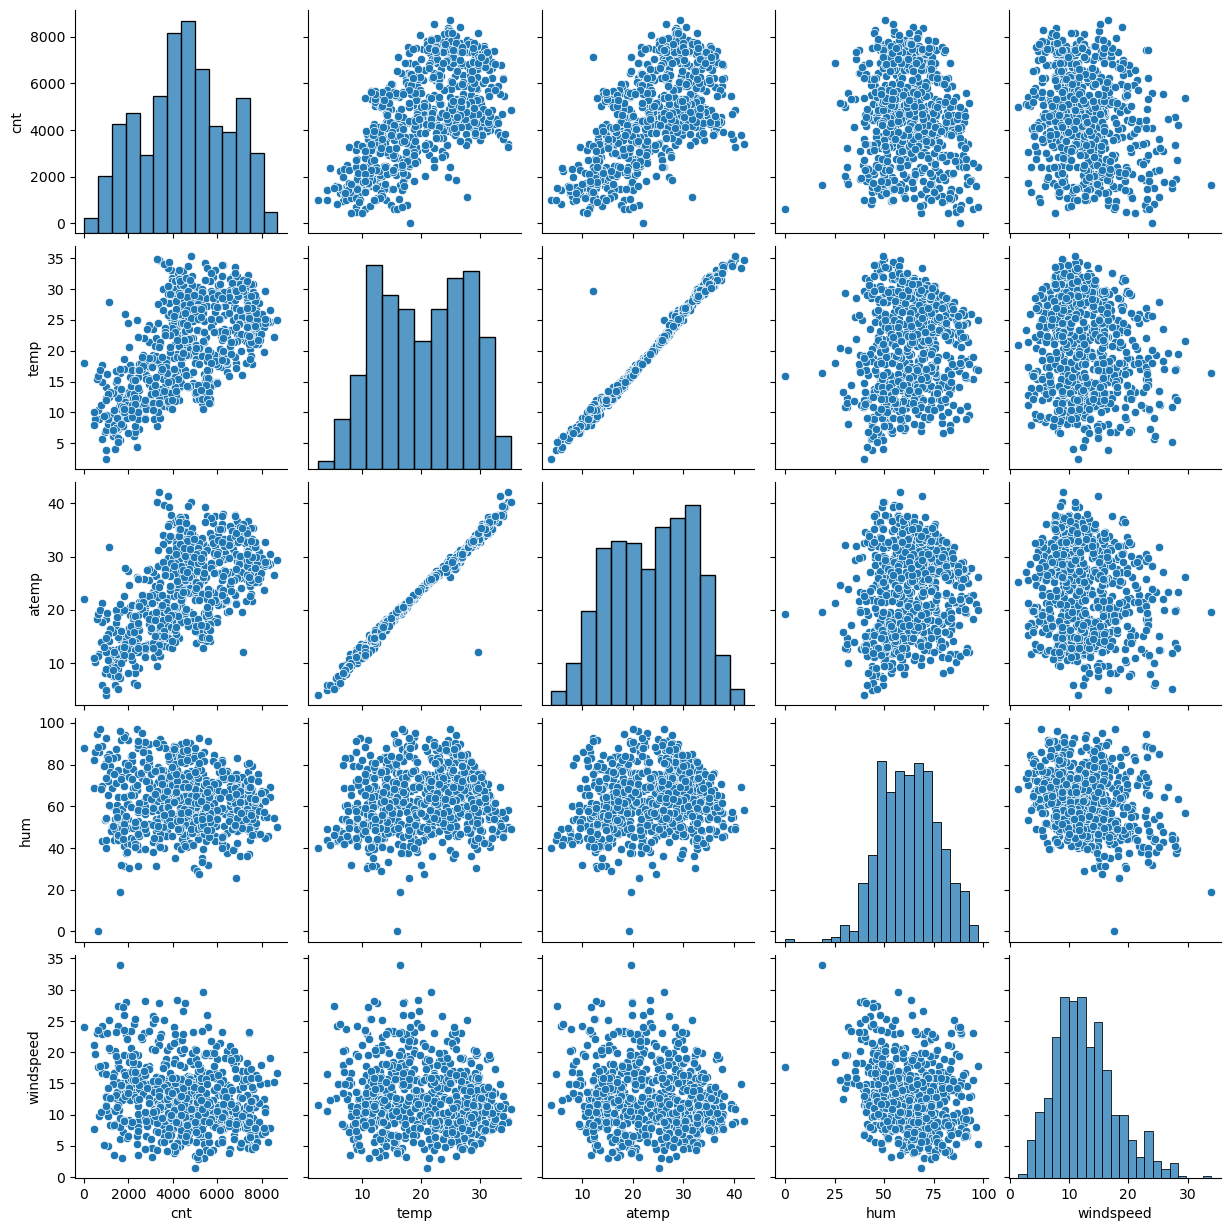

In [22]:
# Visualizing numeric variables using pair plot
sns.pairplot(data=bike, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

# Observation

Atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

In [23]:
# Converting Season and weathersit columns to categorical values for better readability
bike.season.replace({1: 'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
bike.weathersit.replace({1: 'Pleasant', 2:'Moderate', 3:'Bad', 4:'Severe'}, inplace=True)

# converting weekday column to categorical
bike.weekday.replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}, inplace=True)

In [24]:
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# creating dummy variables for mnth, season, weekday, weathersit
dummy = bike[['season', 'mnth', 'weekday', 'weathersit']]       
dummy = pd.get_dummies(dummy, drop_first=True, dtype=int)  

In [26]:
# Add dummy columns to the original dataset
bike = pd.concat([dummy, bike], axis=1)
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Deleting original columns mnth,season, weathersit, weekday
bike.drop(['season', 'mnth', 'weathersit', 'weekday'], axis=1, inplace=True)
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Moderate,weathersit_Pleasant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
bike.shape


(730, 30)

In [29]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_Spring        730 non-null    int32  
 1   season_Summer        730 non-null    int32  
 2   season_Winter        730 non-null    int32  
 3   mnth_Aug             730 non-null    int32  
 4   mnth_Dec             730 non-null    int32  
 5   mnth_Feb             730 non-null    int32  
 6   mnth_Jan             730 non-null    int32  
 7   mnth_Jul             730 non-null    int32  
 8   mnth_Jun             730 non-null    int32  
 9   mnth_Mar             730 non-null    int32  
 10  mnth_May             730 non-null    int32  
 11  mnth_Nov             730 non-null    int32  
 12  mnth_Oct             730 non-null    int32  
 13  mnth_Sep             730 non-null    int32  
 14  weekday_Monday       730 non-null    int32  
 15  weekday_Saturday     730 non-null    int

### Splitting Data into train and test sets


In [30]:
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)


In [31]:
print(bike_train.shape)
print(bike_test.shape) 

(510, 30)
(220, 30)


### Rescaling features


#### Here we will use Min Max scaling


In [32]:
scaler = MinMaxScaler()


In [33]:
numvars = ['cnt', 'windspeed', 'hum', 'temp', 'atemp']       
bike_train[numvars]=scaler.fit_transform(bike_train[numvars])

In [34]:
bike_train.head()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Moderate,weathersit_Pleasant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [35]:
bike_train.describe()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Moderate,weathersit_Pleasant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.345098,0.625490,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.475867,0.484471,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


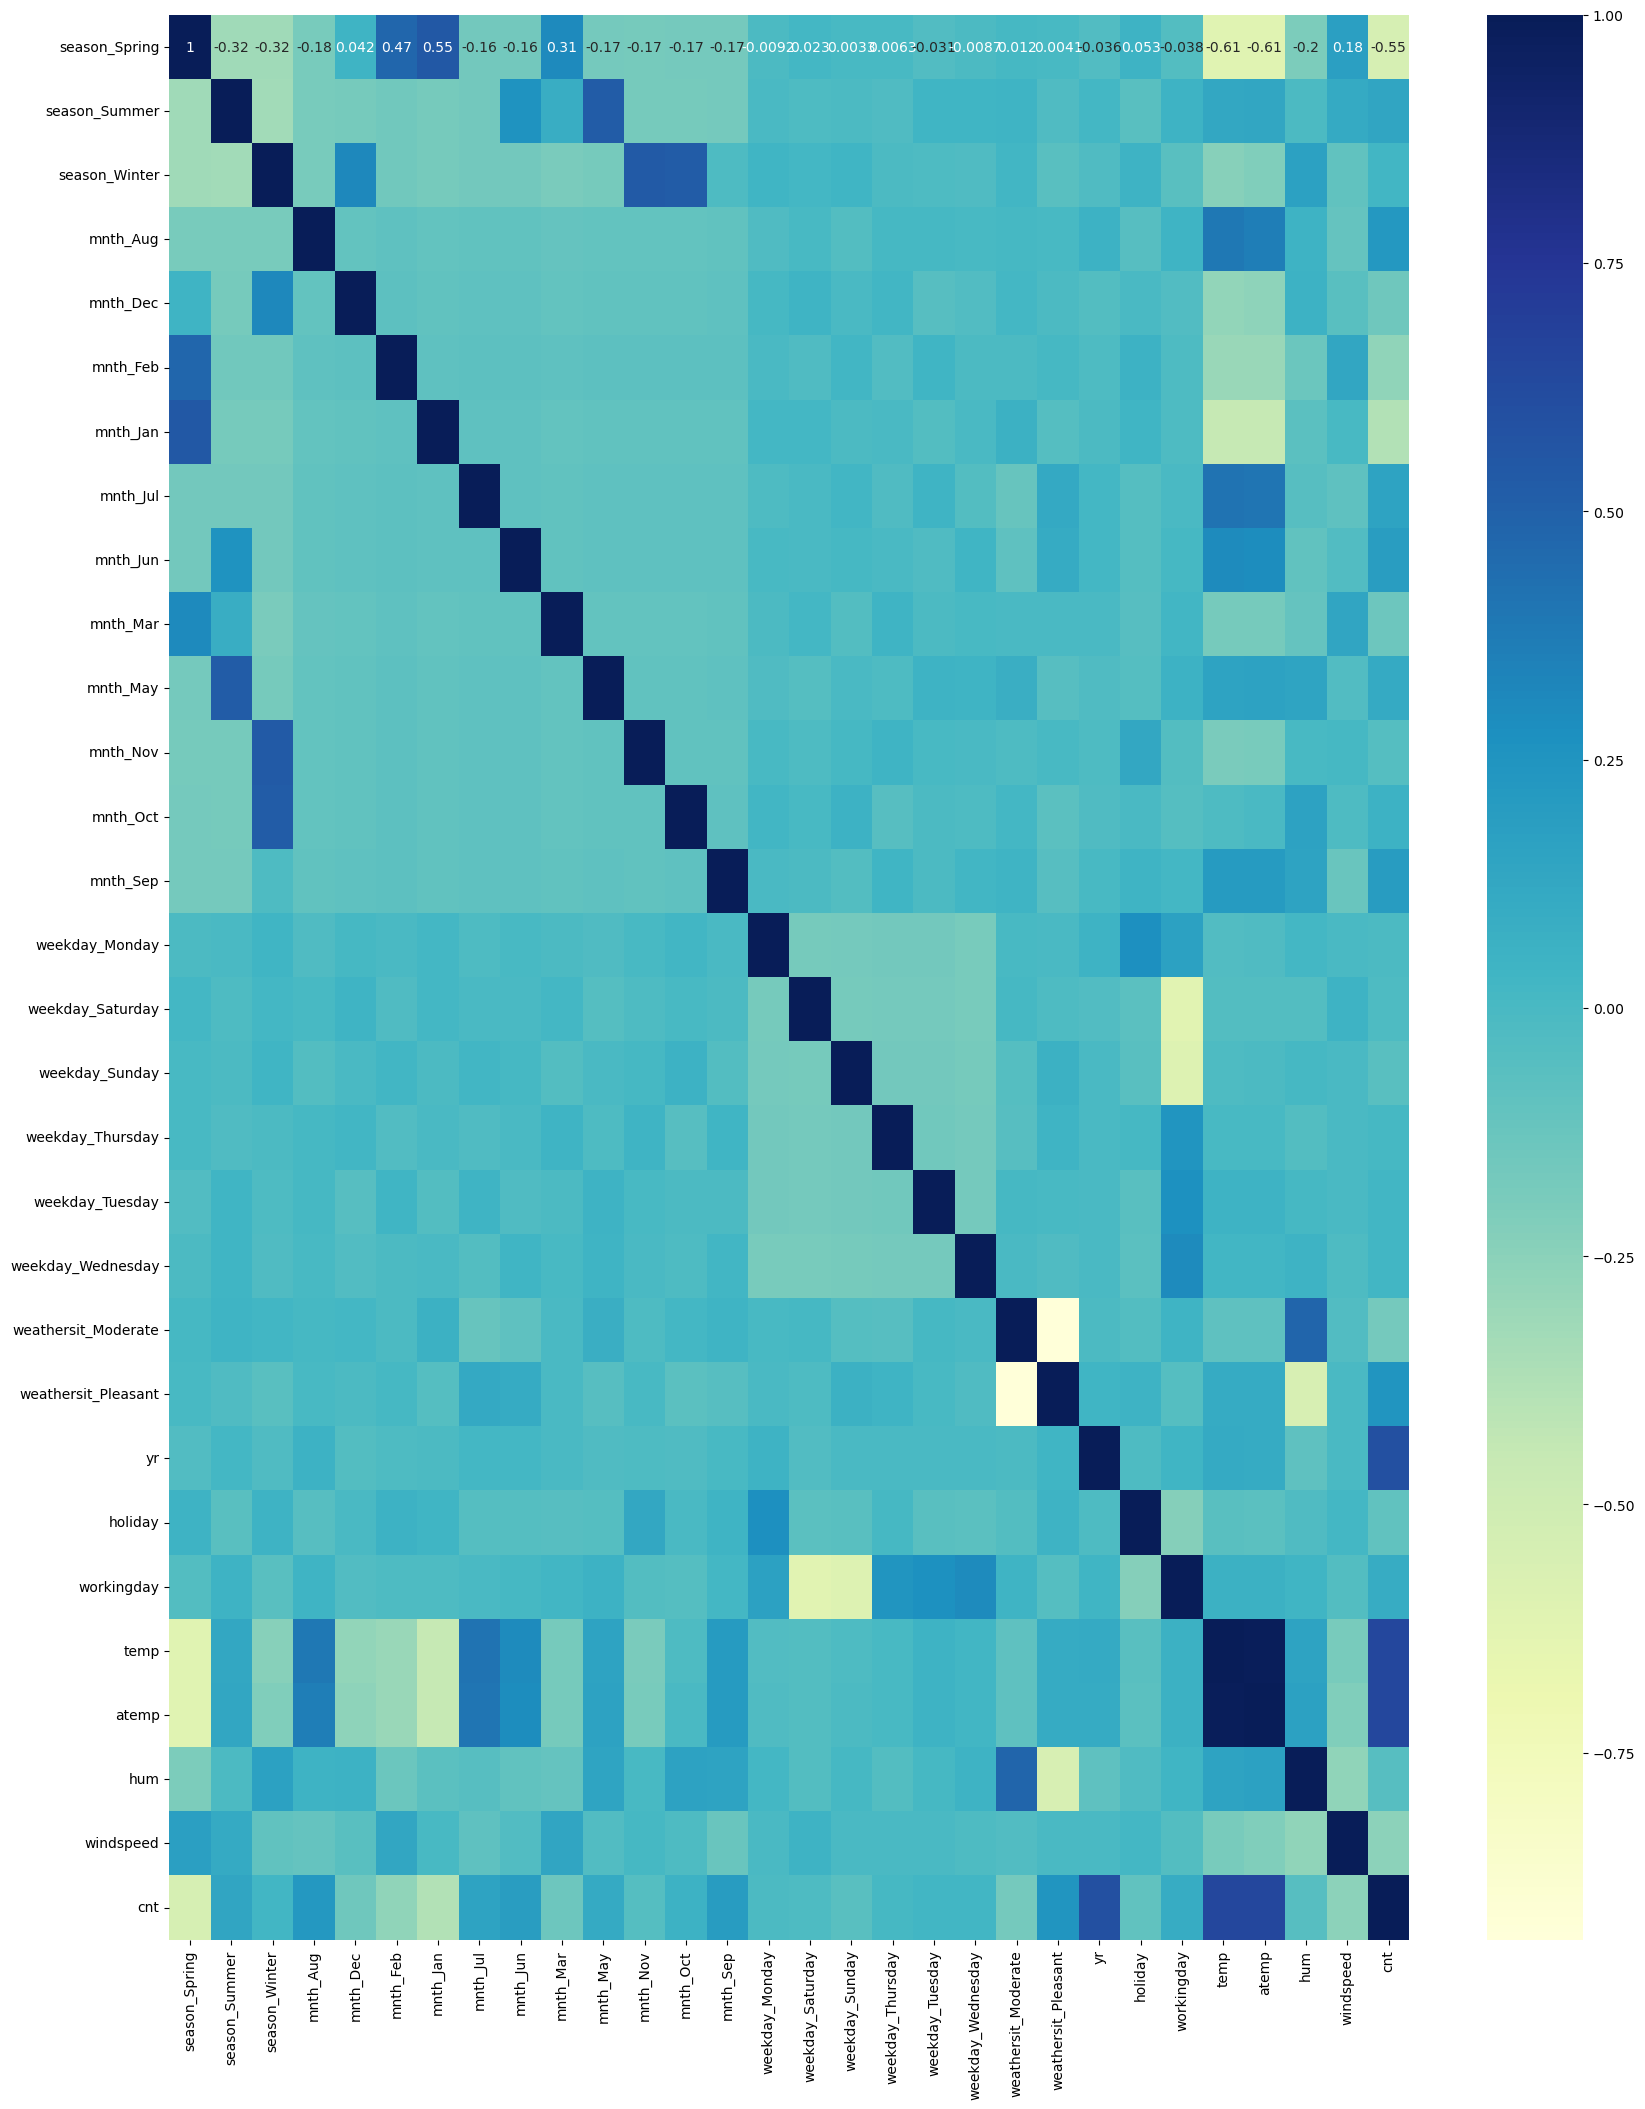

In [36]:
# Now rescaling done
 # Checking the heatmap for which coefficients are highly correlated
 #heatmap
plt.figure(figsize=(20, 25))
sns.heatmap(bike_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Observations:


##### Can see from above, atemp and temp variables are highly correlated with target variable cnt.


In [38]:
# Divide X and y sets for model building
y_train = bike_train.pop('cnt')
X_train = bike_train


In [39]:
y_train.shape


(510,)

#### Feature Selection


In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Moderate', True, 1),
 ('weathersit_Pleasant', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday', 'weathersit_Moderate',
       'weathersit_Pleasant', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [43]:
# First creating dataframe with RFE
X_train_rfe = X_train[col]

In [44]:
# Add constant variable
X_train_sm = sm.add_constant(X_train_rfe)

In [45]:
X_train_sm.head()


,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Moderate,weathersit_Pleasant,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,0,1,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,1,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,1,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,1,0,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,1,0,0,0,1,0.345824,0.751824,0.380981


In [46]:
# Buidling first linear model 
lm_model = sm.OLS(y_train, X_train_sm).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.22e-191
Time:                        20:15:03   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0044      0.048      0.092      0.927      -0.091       0.099
season_Spring          -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer           0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter           0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday        0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Moderate     0.1911      0.025      7.755      0.000       0.143       0.240
weathersit_Pleasant     0.2475      0.026      9.507      0.000       0.196       0.299
yr                      0.2305      0.008     28.795      0.000       0.215       0.246
holiday                -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday              0.0433      0.012      3.762      0.000       0.021       0.066
temp                    0.5096      0.034     14.837      0.000       0.442       0.577
hum                    -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed              -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,features,VIF
13,hum,25.63
12,temp,22.84
8,weathersit_Pleasant,14.80
7,weathersit_Moderate,9.07
0,season_Spring,5.69
11,workingday,5.42
14,windspeed,4.69
2,season_Winter,4.12
1,season_Summer,3.21
9,yr,2.10


In [48]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)


In [49]:
X_train_rfe.head()


,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Moderate,weathersit_Pleasant,yr,holiday,workingday,temp,windspeed
576,0,0,0,0,1,0,0,0,1,1,0,1,0.815169,0.264686
426,1,0,0,0,0,0,1,1,0,1,0,0,0.442393,0.255342
728,1,0,0,0,0,0,0,0,1,1,0,0,0.245101,0.663106
482,0,1,0,0,0,0,1,1,0,1,0,0,0.395666,0.188475
111,0,1,0,0,0,0,0,1,0,0,0,1,0.345824,0.380981


In [50]:
# Model 2
X_train_sm = sm.add_constant(X_train_rfe)
lm_model2 = sm.OLS(y_train, X_train_sm).fit()
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.60e-188
Time:                        20:15:44   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1171      0.039     -2.980      0.003      -0.194      -0.040
season_Spring          -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer           0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter           0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Saturday        0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Moderate     0.2095      0.025      8.499      0.000       0.161       0.258
weathersit_Pleasant     0.2908      0.024     11.977      0.000       0.243       0.339
yr                      0.2345      0.008     29.009      0.000       0.219       0.250
holiday                -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday              0.0464      0.012      3.966      0.000       0.023       0.069
temp                    0.4722      0.034     14.005      0.000       0.406       0.538
windspeed              -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation


###### Here P value is less than 0.05, next we wil check for VIF

In [52]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,features,VIF
8,weathersit_Pleasant,14.79
12,temp,13.96
7,weathersit_Moderate,8.48
11,workingday,5.34
13,windspeed,4.67
0,season_Spring,4.48
1,season_Summer,2.79
2,season_Winter,2.74
9,yr,2.08
6,weekday_Saturday,1.99


In [53]:
X_train_rfe = X_train_rfe.drop(['weathersit_Moderate'], axis=1)


In [54]:
# Model 3
X_train_sm = sm.add_constant(X_train_rfe)
lm_model3 = sm.OLS(y_train, X_train_sm).fit()
lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.39e-175
Time:                        20:16:56   Log-Likelihood:                 476.02
No. Observations:                 510   AIC:                            -924.0
Df Residuals:                     496   BIC:                            -864.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0819      0.034      2.427      0.016       0.016       0.148
season_Spring          -0.0574      0.022     -2.569      0.010      -0.101      -0.013
season_Summer           0.0479      0.016      2.985      0.003       0.016       0.079
season_Winter           0.0717      0.018      3.909      0.000       0.036       0.108
mnth_Jan               -0.0332      0.019     -1.768      0.078      -0.070       0.004
mnth_Jul               -0.0533      0.020     -2.723      0.007      -0.092      -0.015
mnth_Sep                0.0716      0.018      4.016      0.000       0.037       0.107
weekday_Saturday        0.0550      0.016      3.501      0.001       0.024       0.086
weathersit_Pleasant     0.0972      0.009     10.816      0.000       0.080       0.115
yr                      0.2380      0.009     27.576      0.000       0.221       0.255
holiday                -0.0528      0.029     -1.808      0.071      -0.110       0.005
workingday              0.0433      0.012      3.465      0.001       0.019       0.068
temp                    0.4769      0.036     13.229      0.000       0.406       0.548
windspeed              -0.1784      0.026     -6.748      0.000      -0.230      -0.126
==============================================================================
Omnibus:                       97.632   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.925
Skew:                          -0.892   Prob(JB):                     4.52e-66
Kurtosis:                       6.314   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,features,VIF
11,temp,7.83
10,workingday,5.18
12,windspeed,4.63
0,season_Spring,3.18
7,weathersit_Pleasant,2.71
1,season_Summer,2.32
8,yr,2.07
2,season_Winter,1.97
6,weekday_Saturday,1.95
3,mnth_Jan,1.61


In [56]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)


In [57]:
# Model 4
X_train_sm = sm.add_constant(X_train_rfe)
lm_model4 = sm.OLS(y_train, X_train_sm).fit()
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.59e-175
Time:                        20:17:23   Log-Likelihood:                 474.34
No. Observations:                 510   AIC:                            -922.7
Df Residuals:                     497   BIC:                            -867.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0749      0.034      2.229      0.026       0.009       0.141
season_Spring          -0.0582      0.022     -2.599      0.010      -0.102      -0.014
season_Summer           0.0482      0.016      2.997      0.003       0.017       0.080
season_Winter           0.0709      0.018      3.859      0.000       0.035       0.107
mnth_Jan               -0.0338      0.019     -1.793      0.074      -0.071       0.003
mnth_Jul               -0.0523      0.020     -2.667      0.008      -0.091      -0.014
mnth_Sep                0.0698      0.018      3.913      0.000       0.035       0.105
weekday_Saturday        0.0629      0.015      4.163      0.000       0.033       0.093
weathersit_Pleasant     0.0967      0.009     10.738      0.000       0.079       0.114
yr                      0.2382      0.009     27.533      0.000       0.221       0.255
workingday              0.0511      0.012      4.355      0.000       0.028       0.074
temp                    0.4771      0.036     13.203      0.000       0.406       0.548
windspeed              -0.1792      0.026     -6.765      0.000      -0.231      -0.127
==============================================================================
Omnibus:                      101.016   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.874
Skew:                          -0.918   Prob(JB):                     2.56e-69
Kurtosis:                       6.391   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,features,VIF
10,temp,7.62
9,workingday,4.62
11,windspeed,4.62
0,season_Spring,3.11
7,weathersit_Pleasant,2.70
1,season_Summer,2.31
8,yr,2.07
2,season_Winter,1.91
6,weekday_Saturday,1.82
3,mnth_Jan,1.61


In [59]:
X_train_rfe = X_train_rfe.drop(['mnth_Jan'], axis=1)


In [60]:
# Model 5
X_train_sm = sm.add_constant(X_train_rfe)
lm_model5 = sm.OLS(y_train, X_train_sm).fit()
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.37e-176
Time:                        20:17:45   Log-Likelihood:                 472.70
No. Observations:                 510   AIC:                            -921.4
Df Residuals:                     498   BIC:                            -870.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602      0.033      1.843      0.066      -0.004       0.124
season_Spring          -0.0630      0.022     -2.832      0.005      -0.107      -0.019
season_Summer           0.0509      0.016      3.173      0.002       0.019       0.082
season_Winter           0.0764      0.018      4.201      0.000       0.041       0.112
mnth_Jul               -0.0537      0.020     -2.737      0.006      -0.092      -0.015
mnth_Sep                0.0702      0.018      3.927      0.000       0.035       0.105
weekday_Saturday        0.0627      0.015      4.140      0.000       0.033       0.092
weathersit_Pleasant     0.0973      0.009     10.792      0.000       0.080       0.115
yr                      0.2375      0.009     27.421      0.000       0.221       0.255
workingday              0.0511      0.012      4.341      0.000       0.028       0.074
temp                    0.4937      0.035     14.108      0.000       0.425       0.562
windspeed              -0.1728      0.026     -6.569      0.000      -0.225      -0.121
==============================================================================
Omnibus:                      100.348   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.762
Skew:                          -0.912   Prob(JB):                     7.37e-69
Kurtosis:                       6.382   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,features,VIF
9,temp,7.54
10,windspeed,4.60
8,workingday,4.59
6,weathersit_Pleasant,2.70
0,season_Spring,2.48
1,season_Summer,2.30
7,yr,2.06
2,season_Winter,1.91
5,weekday_Saturday,1.81
3,mnth_Jul,1.59


###### Here VIFs and p-values both are within an acceptable range. Hence, we finalise lm_model5 as the final model for the future prdeictions.

#### Residual Analysis


In [62]:
# Residual Analysis (Checking error terms are normally distributed)
y_train_pred = lm_model5.predict(X_train_sm)

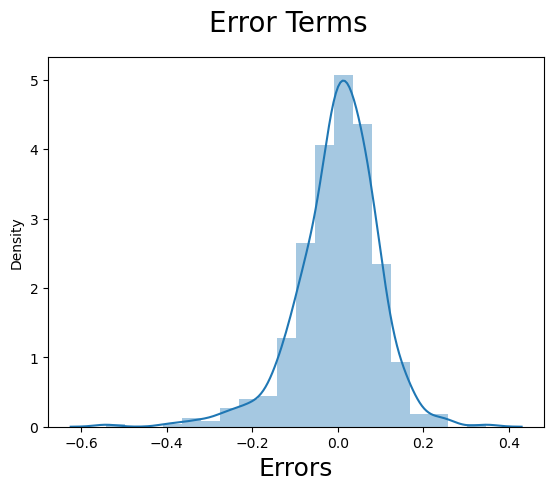

In [63]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

##### Observation : Here error terms follows normal distribution


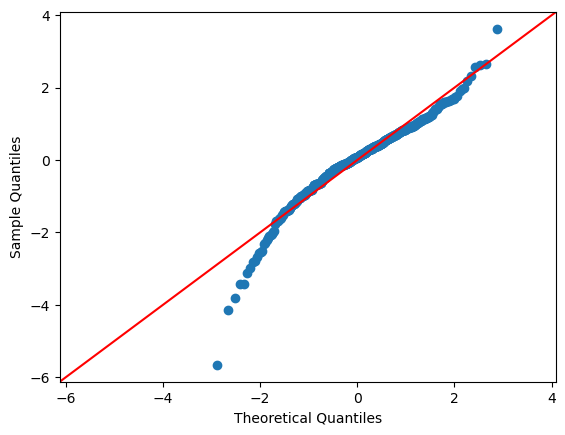

In [65]:
## Check against Q-Q plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Observations


###### Error terms are normally distributed and can see most of the data points are on stright line

##### Making Predictions using Final Model 5


In [67]:
num_vars = ['cnt', 'windspeed', 'hum', 'temp', 'atemp']    
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [68]:
bike_test.describe()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Moderate,weathersit_Pleasant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.318182,0.654545,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.466833,0.476601,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [69]:
# Create X test and y test   
y_test = bike_test.pop('cnt')
X_test = bike_test

In [70]:
y_test.head()


184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [71]:
X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_model5.predict(X_test)
X_test.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Pleasant,yr,workingday,temp,windspeed
184,1.0,0,0,0,1,0,0,0,0,0,0.831783,0.084219
535,1.0,0,1,0,0,0,0,1,1,1,0.901354,0.153728
299,1.0,0,0,1,0,0,0,0,0,1,0.511964,0.334206
221,1.0,0,0,0,0,0,0,1,0,1,0.881625,0.339570
152,1.0,0,1,0,0,0,0,1,0,1,0.817246,0.537414


In [72]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.817529923059055
r2_score of test dataset 0.7943355106561377


##### Observations


######  We can see that the r_squared on the test set is 0.794 and the r-squared on the trained set 0.817 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

Text(0, 0.5, 'y_pred')

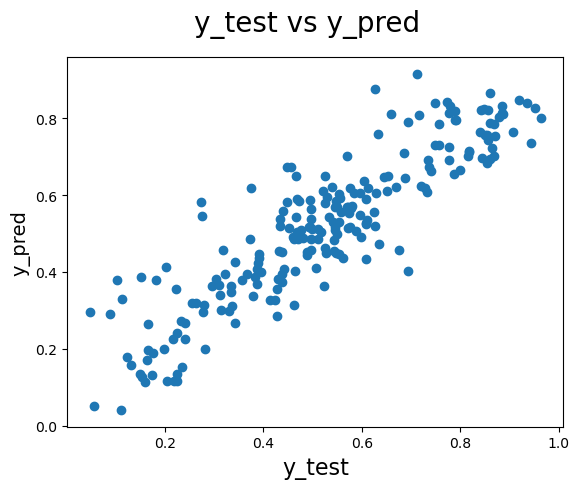

In [73]:
 # Model Evaluation
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 14)

In [74]:
## Now forming final equation of best fitted line
param = pd.DataFrame(lm_model5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.493719
8,yr,0.237519
7,weathersit_Pleasant,0.097303
3,season_Winter,0.076368
5,mnth_Sep,0.070192
6,weekday_Saturday,0.062718
0,const,0.060218
9,workingday,0.051081
2,season_Summer,0.050878


### Now we will see equation of our best fitted line


#### cnt = 0.0602 + 0.494 × temp + 0.237 × yr + 0.0973 × weathersit_Pleasant + 0.0764 × season_Winter + 0.0702 × mnth_Sep + 0.0627 × weekday_Saturday + 0.0511 × workingday + 0.0508 × season_Summer - 0.0537 × mnth_Jul - 0.0631 × season_Spring - 0.1728 × windspeed

### Conclusions


###### 1. All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
2. All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.
3. From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 79% of bike demand.

4. Coeffiencients of the variables explains the factors effecting the bike demand

5. Based on final model top three features contributing significantly towards explaining the demand are:

6. Temperature (0.493719)

7. weathersit : Pleasant (0.097303)

8. year (0.237519)

 Therefore, it is evident that the variables of temperature, season/weather conditions, and month play a significant role in forecasting the demand for shared bikes.

### Recommendations

###### 1. The company should focus on the months of January, July, September, November, and December, as these periods exhibit higher demand compared to others. 
    2. As demand increases with rising temperatures, it is important for the company to monitor weather conditions closely. 
    3. Additionally, during the winter season, demand tends to rise, so the company should be prepared to handle this peak. Conversely, holidays appear to be less appealing for biking; therefore, some targeted motivation and marketing efforts might be beneficial.